# 1D power spectrum

In [1]:
import h5py
import numpy as np
from matplotlib import pyplot as plt

In [8]:
fname_on='/data/desi/common/astrid/spectra_ASTRID_z2.5_500x500x2500.hdf5'
fname_off='/data/desi/common/astrid/spectra_ASTRID_self-shield_off_z2.5_500x500x2500.hdf5'

In [9]:
with h5py.File(fname_on,'r') as f:
    tau_on = f['tau/H/1/1215'][:]
    colden = f['colden']['H/1'][:]
    #axes = f['spectra/axes'][:]
    #cofm_hkpc = f['spectra/cofm'][:]

In [ ]:
with h5py.File(fname_off,'r') as f:
    tau_off = f['tau/H/1/1215'][:]
    # column densities were not stored for this file (should be the same as in the other file)
    #colden_off = f['colden']['H/1'][:]
    axes_off = f['spectra/axes'][:]
    cofm_off = f['spectra/cofm'][:]

## Calculate the one dimensional power spectrum for all values of column density

In [4]:
flux = np.exp(-tau_on)
avg = np.mean(flux)
delta_flux = flux/avg - 1

In [5]:
fft = np.fft.fft(delta_flux)

In [6]:
p1d = fft*fft.conjugate()/2500

In [7]:
average_p1d = np.mean(p1d, axis=0)

In [8]:
np.save('avg_p1d.npy', average_p1d)

In [3]:
average_p1d = np.load('avg_p1d.npy')

In [2]:
k = 2*np.pi/250*np.arange(2500)

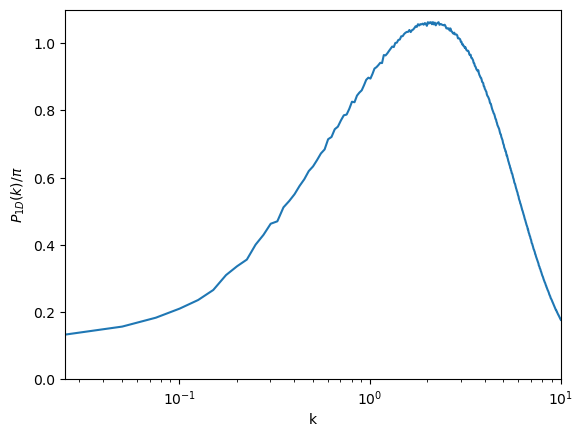

In [9]:
plt.plot(k, k*average_p1d/np.pi)
#plt.plot(k, k[:]*0)
plt.xlim(k[1], 10)
plt.ylim(0,1.1)
plt.xlabel("k")
plt.ylabel(r"$P_{1D}(k)/\pi$")
plt.xscale("log")
plt.show()

In [10]:
L_hMpc=250
Nsk=int(np.sqrt(colden.shape[0]))
Np=int(colden.shape[1])
dz_hMpc=L_hMpc/Np
dxy_hMpc=L_hMpc/Nsk
max_colden=np.max(colden, axis=1)
def skewer_index(ix, iy):
    return ix*Nsk+iy

In [11]:
def HCDs_index(mincolden, maxcolden):  
    
    indexs = np.array([])
    for i in range(Nsk*Nsk):
        if mincolden < max_colden[i] < maxcolden:
            indexs = np.append(indexs, int(i))
    return indexs

In [12]:
index_lya = HCDs_index(0, 1.6e17).astype(int)
index_LLSs = HCDs_index(1.6e17, 1e19).astype(int)
index_subDLAs = HCDs_index(1e19, 2e20).astype(int)
index_smallDLAs = HCDs_index(2e20, 1e21).astype(int)
index_largeDLAs = HCDs_index(1e21, 1e25).astype(int)
index_HCDs = HCDs_index(1.6e17, 1e25).astype(int)

In [13]:
tau_on_lya = tau_on[index_lya]
tau_on_LLSs = tau_on[index_LLSs]
tau_on_subDLAs = tau_on[index_subDLAs]
tau_on_smallDLAs = tau_on[index_smallDLAs]
tau_on_largeDLAs = tau_on[index_largeDLAs]
tau_on_HCDs = tau_on[index_HCDs]

In [ ]:
tau_of_HCDs = tau_of[index_HCDs]

In [15]:
flux_lya = np.exp(-tau_on_lya)
avg_lya = np.mean(flux_lya)
delta_flux_lya = flux_lya / avg_lya - 1
fft_lya = np.fft.fft(delta_flux_lya)
np.save('fft_lya.npy', fft_lya)
p1d_lya = fft_lya * fft_lya.conjugate() / 2500
average_p1d_lya = np.mean(p1d_lya, axis=0)
np.save('avg_p1d_lya.npy', average_p1d_lya)


In [14]:
flux_LLSs = np.exp(-tau_on_LLSs)
avg_LLSs = np.mean(flux_LLSs)
delta_flux_LLSs = flux_LLSs / avg_LLSs - 1
fft_LLSs = np.fft.fft(delta_flux_LLSs)
p1d_LLSs = fft_LLSs * fft_LLSs.conjugate() / 2500
average_p1d_LLSs = np.mean(p1d_LLSs, axis=0)
np.save('avg_p1d_LLSs.npy', average_p1d_LLSs)


In [18]:
flux_subDLAs = np.exp(-tau_on_subDLAs)
avg_subDLAs = np.mean(flux_subDLAs)
delta_flux_subDLAs = flux_subDLAs / avg_subDLAs - 1
fft_subDLAs = np.fft.fft(delta_flux_subDLAs)
p1d_subDLAs = fft_subDLAs * fft_subDLAs.conjugate() / 2500
average_p1d_subDLAs = np.mean(p1d_subDLAs, axis=0)
np.save('avg_p1d_subDLAs.npy', average_p1d_subDLAs)


In [16]:
flux_smallDLAs = np.exp(-tau_on_smallDLAs)
avg_smallDLAs = np.mean(flux_smallDLAs)
delta_flux_smallDLAs = flux_smallDLAs / avg_smallDLAs - 1
fft_smallDLAs = np.fft.fft(delta_flux_smallDLAs)
p1d_smallDLAs = fft_smallDLAs * fft_smallDLAs.conjugate() / 2500
average_p1d_smallDLAs = np.mean(p1d_smallDLAs, axis=0)
np.save('avg_p1d_smallDLAs.npy', average_p1d_smallDLAs)


In [17]:
flux_largeDLAs = np.exp(-tau_on_largeDLAs)
avg_largeDLAs = np.mean(flux_largeDLAs)
delta_flux_largeDLAs = flux_largeDLAs / avg_largeDLAs - 1
fft_largeDLAs = np.fft.fft(delta_flux_largeDLAs)
p1d_largeDLAs = fft_largeDLAs * fft_largeDLAs.conjugate() / 2500
average_p1d_largeDLAs = np.mean(p1d_largeDLAs, axis=0)
np.save('avg_p1d_largeDLAs.npy', average_p1d_largeDLAs)


In [16]:
flux_HCDs = np.exp(-tau_on_HCDs)
avg_HCDs = np.mean(flux_HCDs)
delta_flux_HCDs = flux_HCDs / avg_HCDs - 1
fft_HCDs = np.fft.fft(delta_flux_HCDs)
np.save('fft_HCDs.npy', fft_HCDs)
p1d_HCDs = fft_HCDs * fft_HCDs.conjugate() / 2500
average_p1d_HCDs = np.mean(p1d_HCDs, axis=0)
np.save('avg_p1d_HCDs.npy', average_p1d_HCDs)


In [7]:
average_p1d_lya = np.load('avg_p1d_lya.npy')
average_p1d_LLSs = np.load('avg_p1d_LLSs.npy')
average_p1d_subDLAs = np.load('avg_p1d_subDLAs.npy')
average_p1d_smallDLAs = np.load('avg_p1d_smallDLAs.npy')
average_p1d_largeDLAs = np.load('avg_p1d_largeDLAs.npy')
average_p1d_HCDs = np.load('avg_p1d_HCDs.npy')

In [4]:
fft_lya = np.load('fft_lya.npy')
fft_HCDs = np.load('fft_HCDs.npy')

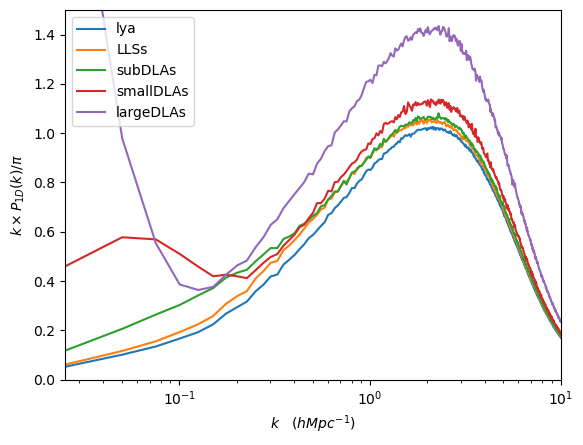

In [12]:
#plt.plot(k, k*average_p1d/np.pi)
plt.plot(k, k*average_p1d_lya/np.pi, label = "lya")
plt.plot(k, k*average_p1d_LLSs/np.pi, label = "LLSs")
plt.plot(k, k*average_p1d_subDLAs/np.pi, label = "subDLAs")
plt.plot(k, k*average_p1d_smallDLAs/np.pi, label = "smallDLAs")
plt.plot(k, k*average_p1d_largeDLAs/np.pi, label = "largeDLAs")
#plt.plot(k, k[:]*0)
plt.xlim(k[1], 10)
plt.ylim(0,1.5)
plt.xlabel(r"$k\quad (hMpc^{-1})$")
plt.ylabel(r"$k\times P_{1D}(k)/\pi$")
plt.xscale("log")
plt.legend()
plt.savefig("Power_spectrum")
plt.show()

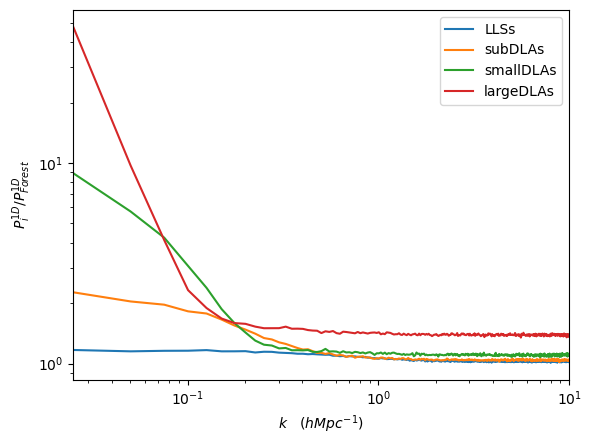

In [19]:
#plt.plot(k, k*average_p1d/np.pi)
#plt.plot(k, k*average_p1d_lya/np.pi, label = "lya")
plt.plot(k, average_p1d_LLSs/average_p1d_lya, label = "LLSs")
plt.plot(k, average_p1d_subDLAs/average_p1d_lya, label = "subDLAs")
plt.plot(k, average_p1d_smallDLAs/average_p1d_lya, label = "smallDLAs")
plt.plot(k, average_p1d_largeDLAs/average_p1d_lya, label = "largeDLAs")
#plt.plot(k, k[:]*0)
plt.xlim(k[1], 10)
#plt.ylim(0.01,1.5)
plt.xlabel(r"$k\quad (hMpc^{-1})$")
plt.ylabel(r"$P_{i}^{1D}/P_{Forest}^{1D}$")
plt.xscale("log")
plt.yscale("log")
plt.legend()
plt.savefig("Power_spectrum_quotient")
plt.show()